In [1]:
!pip install -q diffusers==0.11.1
!pip install -q transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 14.8 MB/s eta 0:00:00


In [1]:
import torch
from diffusers import StableDiffusionPipeline

# Load the Stable Diffusion model pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [2]:
# Move the pipeline to GPU
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

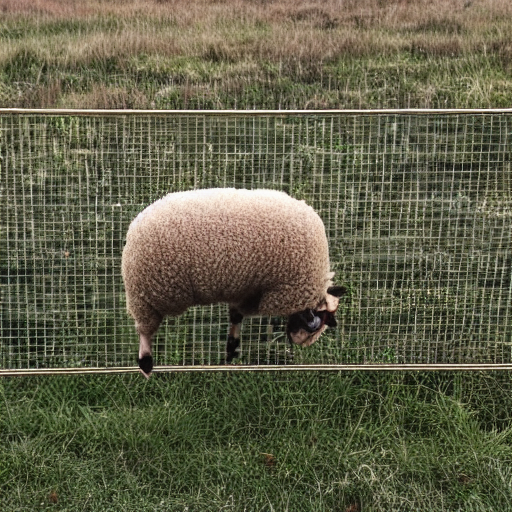

In [4]:
# Set a seed for reproducibility
generator = torch.Generator("cuda").manual_seed(1024)

# Generate and display an image from a prompt
prompt = "golden electric sheep jump over a fence"
image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]
image

In [5]:
import imageio
import numpy as np
from PIL import Image
from IPython.display import HTML
import io
import base64

In [12]:
# Create a video using the images generated using different numbers of inference steps

# Specify the inference steps to loop through
steps_list = [3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]

# Create an in-memory binary stream to store the video
video_stream = io.BytesIO()

# Set the # of frames per second
fps = 2

# Create a video writer object using imageio
with imageio.get_writer(video_stream, format='mp4', fps=fps) as writer:
    for num_steps in steps_list:
        # Generate an image using the current # of inference steps
        result = pipe(prompt, num_inference_steps=num_steps, generator=generator).images[0]
        # Convert the image to a numpy array
        image_np = np.array(result)
        # Add the image to the video writer
        writer.append_data(image_np)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
# Display the video in the notebook

# Seek to the start of the stream
video_stream.seek(0)

# Encode the video for embedding
video_encoded = base64.b64encode(video_stream.read()).decode('utf-8')

# Display the video
HTML(data=f'''
    <video width=400 controls>
        <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
    </video>
''')

In [43]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Save the video to Google Drive

drive_path = '/content/drive/My Drive/video/inference_steps.mp4'

with open(drive_path, 'wb') as f:
    video_stream.seek(0)
    f.write(video_stream.read())

print(f'Video saved to {drive_path}')

Video saved to /content/drive/My Drive/video/inference_steps.mp4
